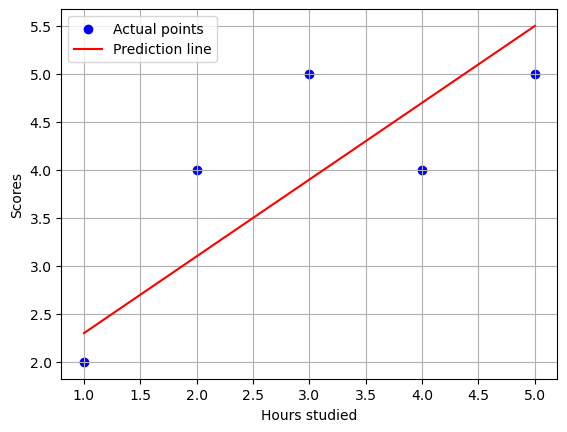

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x = np.array([1, 2, 3, 4, 5])        # Hours studied
y = np.array([2, 4, 5, 4, 5])        # Scores

# Assume slope (m) = 0.8 and intercept (b) = 1.5
m, b = 0.8, 1.5
y_pred = m * x + b

# Plot
plt.scatter(x, y, color='blue', label='Actual points')
plt.plot(x, y_pred, color='red', label='Prediction line')
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.grid()
plt.legend()
plt.show()


In [2]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Example
y_pred = m * x + b
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)


MSE: 0.5699999999999998


In [3]:
import numpy as np

# Data
x = np.array([1, 2, 3, 4, 5])        # hours studied
y = np.array([2, 4, 5, 4, 5])        # actual scores

# Initialize parameters
m = 0
b = 0
learning_rate = 0.01
epochs = 1000  # number of times we'll adjust

n = len(x)

# Gradient Descent Loop
for _ in range(epochs):
    y_pred = m * x + b
    # calculate gradients
    dm = (-2/n) * np.sum(x * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    # update parameters
    m -= learning_rate * dm
    b -= learning_rate * db

print(f"m (slope): {m:.2f}")
print(f"b (intercept): {b:.2f}")

# Predictions after training
predicted = m * x + b
print("Predicted scores:", predicted)


m (slope): 0.62
b (intercept): 2.14
Predicted scores: [2.75381144 3.37150606 3.98920067 4.60689529 5.2245899 ]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data
data = {
    'Experience': [1, 2, 3, 4, 5],
    'Age': [22, 25, 28, 35, 40],
    'Salary': [25000, 30000, 40000, 50000, 60000]
}

df = pd.DataFrame(data)

X = df[['Experience', 'Age']]  # Independent variables
y = df['Salary']               # Dependent variable

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predictions
predictions = model.predict(X)
print("Predicted salaries:", predictions)



Predicted salaries: [24125. 31625. 39125. 50375. 59750.]


Explanation:
Here, the model learns how both Experience and Age together influence Salary.
Each input feature gets its own weight (coefficient).

You can check them using:

In [9]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [4687.5  937.5]
Intercept: -1187.5


In [8]:
# Calculate Score of prediction
score = model.score(X, y)
print("Model R^2 Score:", score)

Model R^2 Score: 0.9946646341463414


### Feature Scaling & Normalization

When your features have different ranges (like “Age” in years and “Salary” in dollars), the model can get confused.
To fix that, we scale or normalize them so they’re on a similar range.

Example using StandardScaler:

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)
predictions_scaled = model.predict(X_scaled)
print("Predicted salaries with scaled features:", predictions_scaled)


Predicted salaries with scaled features: [24125. 31625. 39125. 50375. 59750.]


### Handling Categorical Variables (Brief)

Sometimes, data contains text values like “Male” or “Female”, or “City A”, “City B”.
We can’t feed text directly into a model, so we use encoding.

Example using OneHotEncoder:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cities = np.array([['Lagos'], ['Abuja'], ['Uyo']])
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(cities)

print(encoded)

# This converts text into numeric form that the model can understand.


[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


### Model Evaluation Metrics

After training a model, we need to check how well it actually learned the relationship between the inputs and outputs.
That’s where evaluation metrics come in — they help us measure the model’s performance.

Let’s look at three common ones for regression:

 #### a) Mean Squared Error (MSE)

MSE tells us how far off our predictions are on average.
It squares the difference between the actual and predicted values, then takes the mean (average).


Smaller MSE means better predictions.

Example:

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_actual = np.array([2, 4, 5, 4, 5])
y_pred = np.array([2.2, 3.9, 4.8, 4.1, 5.2])

mse = mean_squared_error(y_actual, y_pred)
print("MSE:", mse)

# If the MSE is small (e.g. 0.05), it means our model is doing well.
# If it’s large, the predictions are far off.


MSE: 0.028000000000000032


#### (b) Root Mean Squared Error (RMSE)

RMSE is just the square root of MSE.
It brings the error back to the same scale as the data, making it easier to interpret.

In [2]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 0.16733200530681522


# POLYNOMIAL REGRESSION

Now that you understand how we evaluate the model, let’s move into the last part of our Week 1 topics — Polynomial Regression and how it connects to Overfitting and Underfitting.

🧠 What’s Polynomial Regression?

You already know linear regression tries to fit a straight line through the data.
But not every relationship in real life is straight.

For example:

Studying more hours improves scores, but after a point, too much study can reduce performance (fatigue).

The relationship between temperature and ice cream sales might curve up and down.

That’s where polynomial regression comes in — it allows your model to fit a curve instead of just a straight line.

⚙️ How it works

Polynomial regression is still linear regression underneath — but we add new features that are powers of the existing ones.

For example:

If your feature is X = studiedHours

You can add x**2 x**3

Now your model learns a curve instead of a line.

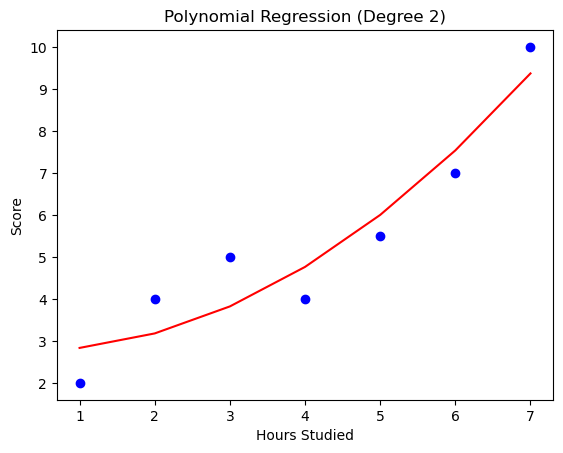

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data (hours studied vs score)
x = np.array([1, 2, 3, 4, 5, 6, 7]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5.5, 7, 10])

# Transform the data to include polynomial terms
poly = PolynomialFeatures(degree=2)  # quadratic curve
x_poly = poly.fit_transform(x)

# Train the model
model = LinearRegression()
model.fit(x_poly, y)

# Predict and plot
y_pred = model.predict(x_poly)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.title("Polynomial Regression (Degree 2)")
plt.show()


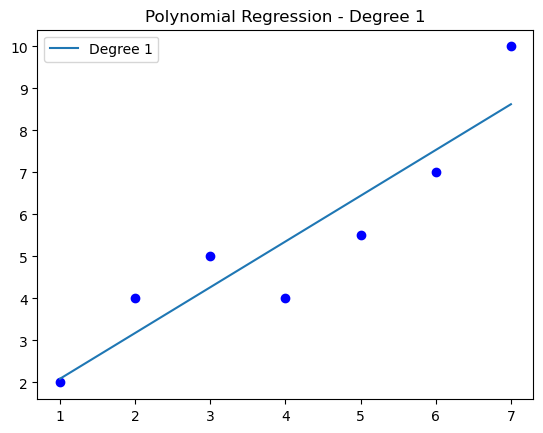

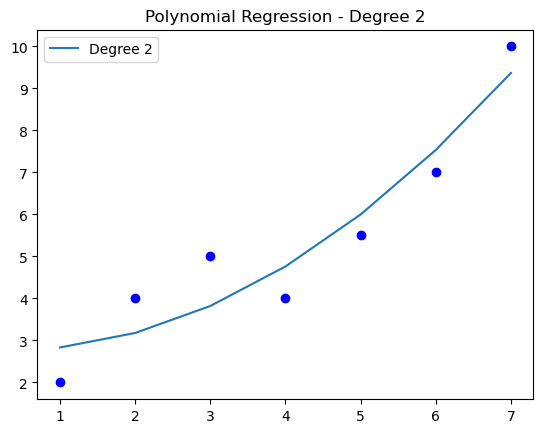

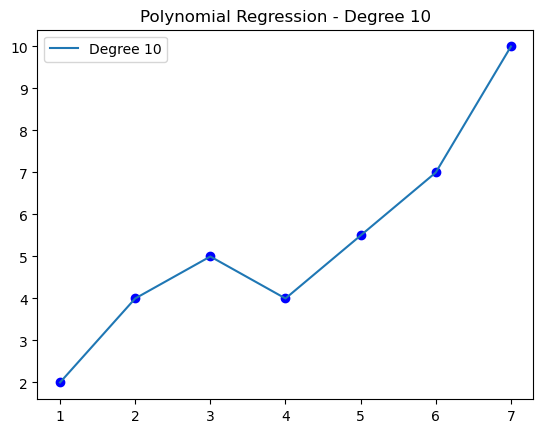

In [2]:
# Overfitting and Underfitting in this context

for degree in [1, 2, 10]:
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    
    plt.scatter(x, y, color='blue')
    plt.plot(x, y_pred, label=f'Degree {degree}')
    plt.legend()
    plt.title(f"Polynomial Regression - Degree {degree}")
    plt.show()


You’ll notice:

Degree 1: The line misses the curve → underfitting

Degree 2: Follows the trend nicely → good fit

Degree 10: Zig-zags perfectly through every point → overfitting

🧘🏽 How to avoid overfitting

Use a simpler model (lower degree)

Split data into training/test sets to check generalization

Use regularization (we’ll learn that next week)